<a href="https://colab.research.google.com/github/NishthaJethani/traffic-sign-detection-recognition/blob/main/traffic_sign_detection_recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive

drive.mount('/content/drive')

kaggle_api_key = "/content/drive/My Drive/kaggle.json"


Mounted at /content/drive


In [2]:
import os
os.environ["KAGGLE_CONFIG_DIR"] = "/content/"
!cp "{kaggle_api_key}" /content/kaggle.json
!chmod 600 /content/kaggle.json


In [3]:
import kaggle

kaggle_dataset_name = "sarangdilipjodh/indian-traffic-signs-prediction85-classes"

# Replace 'destination_directory' with the desired destination within your Colab environment
destination_directory = "/content/dataset/"

# Use the Kaggle API to load the dataset without downloading it
kaggle.api.dataset_download_files(kaggle_dataset_name, path=destination_directory, unzip=True)


In [4]:
extracted_files=os.listdir("/content/dataset/traffic_sign_classification_dataset")
print(extracted_files)

['test', 'train']


In [5]:
from tensorflow.keras.preprocessing import image_dataset_from_directory

train_data_dir = '/content/dataset/traffic_sign_classification_dataset/train'
test_data_dir='/content/dataset/traffic_sign_classification_dataset/test'

train=image_dataset_from_directory(
    train_data_dir,
    labels='inferred',
    label_mode='categorical',
    image_size=[128,128],
    interpolation='nearest',
    validation_split=0.2,
    batch_size=64,
    shuffle=True,
    seed=42,
    subset="training",
)

validate=image_dataset_from_directory(
    train_data_dir,
    labels='inferred',
    label_mode='categorical',
    image_size=[128,128],
    interpolation='nearest',
    validation_split=0.2,
    batch_size=64,
    shuffle=False,
    seed=42,
    subset="validation",
)

test=image_dataset_from_directory(
    test_data_dir,
    labels='inferred',
    label_mode='categorical',
    image_size=[128,128],
    interpolation='nearest',
    batch_size=64,
    shuffle=False,
)


Found 4438 files belonging to 85 classes.
Using 3551 files for training.
Found 4438 files belonging to 85 classes.
Using 887 files for validation.
Found 1288 files belonging to 85 classes.


In [26]:
signs=[]

all_signs=os.listdir(train_data_dir)

for item in all_signs:
  signs.append(item)



signs

['WIDTH_LIMIT',
 'SPEED_LIMIT_80',
 'STOP',
 'CATTLE',
 'NO_ENTRY',
 'SLIPPERY_ROAD',
 'TRAFFIC_SIGNAL',
 'ROAD_WIDENS_AHEAD',
 'SPEED_LIMIT_30',
 'TONGA_PROHIBITED',
 'LOOSE_GRAVEL',
 'PEDESTRIAN_CROSSING',
 'STRAIGHT_PROHIBITED',
 'QUAY_SIDE_OR_RIVER_BANK',
 'GAP_IN_MEDIAN',
 'RIGHT_TURN_PROHIBITED',
 'STEEP_ASCENT',
 'COMPULSARY_TURN_RIGHT',
 'PEDESTRIAN_PROHIBITED',
 'COMPULSARY_CYCLE_TRACK',
 'HANDCART_PROHIBITED',
 'SCHOOL_AHEAD',
 'SPEED_LIMIT_40',
 'GIVE_WAY',
 'CYCLE_PROHIBITED',
 'COMPULSARY_TURN_RIGHT_AHEAD',
 'LEFT_REVERSE_BEND',
 'COMPULSARY_SOUND_HORN',
 'RIGHT_HAND_CURVE',
 'TRUCK_PROHIBITED',
 'SIDE_ROAD_RIGHT',
 'PASS_EITHER_SIDE',
 'ALL_MOTOR_VEHICLE_PROHIBITED',
 'CYCLE_CROSSING',
 'LEFT_TURN_PROHIBITED',
 'BULLOCK_AND_HANDCART_PROHIBITED',
 'COMPULSARY_KEEP_RIGHT',
 'HUMP_OR_ROUGH_ROAD',
 'COMPULSARY_TURN_LEFT',
 'RIGHT_REVERSE_BEND',
 'COMPULSARY_TURN_LEFT_AHEAD',
 'DANGEROUS_DIP',
 'FERRY',
 'COMPULSARY_MINIMUM_SPEED',
 'SPEED_LIMIT_5',
 'TURN_RIGHT',
 'BULLOCK_PR

In [12]:
from tensorflow.keras import models, layers

model=models.Sequential([
    layers.Conv2D(filters=16, kernel_size=(5,5), activation='relu', input_shape=(128,128,3)),
    layers.Conv2D(filters=32, kernel_size=(5,5), activation='relu'),
    layers.MaxPool2D(pool_size=(2, 2)),
    layers.BatchNormalization(axis=-1),

    layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    layers.MaxPool2D(pool_size=(2, 2)),
    layers.BatchNormalization(axis=-1),
    layers.Dropout(rate=0.25),
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(rate=0.25),

    layers.Dense(85, activation='softmax')
])

In [13]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 124, 124, 16)      1216      
                                                                 
 conv2d_5 (Conv2D)           (None, 120, 120, 32)      12832     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 60, 60, 32)       0         
 2D)                                                             
                                                                 
 batch_normalization_3 (Batc  (None, 60, 60, 32)       128       
 hNormalization)                                                 
                                                                 
 conv2d_6 (Conv2D)           (None, 58, 58, 64)        18496     
                                                                 
 conv2d_7 (Conv2D)           (None, 56, 56, 64)       

In [14]:
from tensorflow import keras

model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.01), loss='categorical_crossentropy', metrics=['accuracy'])


Epoch 1/50
56/56 [==============================] - 55s 618ms/step - loss: 3.5287 - accuracy: 0.3171 - val_loss: 28.1257 - val_accuracy: 0.0902
Epoch 2/50
56/56 [==============================] - 39s 578ms/step - loss: 1.9184 - accuracy: 0.5810 - val_loss: 2.6415 - val_accuracy: 0.4927
Epoch 3/50
56/56 [==============================] - 38s 606ms/step - loss: 1.0066 - accuracy: 0.7415 - val_loss: 1.5496 - val_accuracy: 0.6088
Epoch 4/50
56/56 [==============================] - 36s 566ms/step - loss: 0.5845 - accuracy: 0.8417 - val_loss: 0.3555 - val_accuracy: 0.9245
Epoch 5/50
56/56 [==============================] - 38s 573ms/step - loss: 0.3361 - accuracy: 0.9099 - val_loss: 0.5257 - val_accuracy: 0.8940
Epoch 6/50
56/56 [==============================] - 39s 583ms/step - loss: 0.1875 - accuracy: 0.9516 - val_loss: 0.2531 - val_accuracy: 0.9324
Epoch 7/50
56/56 [==============================] - 39s 579ms/step - loss: 0.1109 - accuracy: 0.9701 - val_loss: 0.3597 - val_accuracy: 0.897

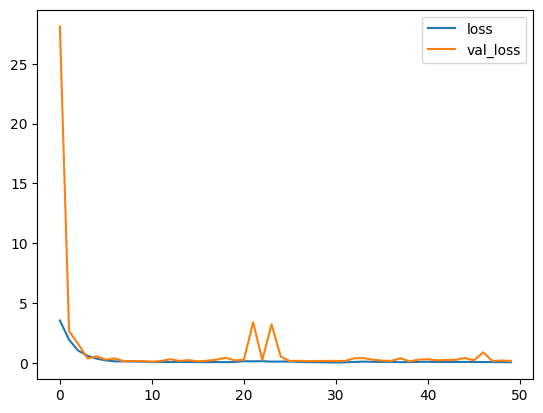

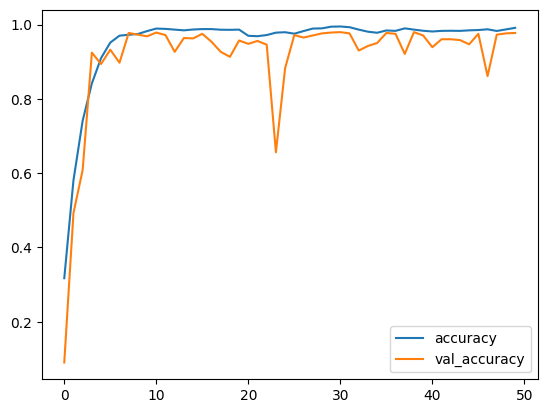

In [15]:
history=model.fit(train, epochs=50, validation_data=validate)

import pandas as pd
history_frame = pd.DataFrame(history.history)
history_frame.loc[:, ['loss', 'val_loss']].plot()
history_frame.loc[:, ['accuracy', 'val_accuracy']].plot();

In [18]:
test_loss, test_accuracy = model.evaluate(test)

print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)


21/21 [==============================] - 6s 283ms/step - loss: 1.7298 - accuracy: 0.8199
Test Loss: 1.7298266887664795
Test Accuracy: 0.8198757767677307
